What is the greatest indicator of employee satisfaction?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy import stats
from scipy.stats import ttest_ind
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
plt.rcParams['figure.figsize'] = (8.0, 4.0)

In [3]:
df.rename(columns={'average_montly_hours':'average_monthly_hours'}, inplace=True)
df.rename(columns={'Work_accident':'work_accident'}, inplace=True)
df.rename(columns={'sales':'department'}, inplace=True)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


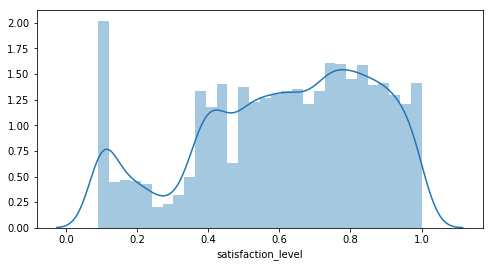

In [6]:
sns.distplot(df.satisfaction_level)
plt.show()

In [7]:
df2 = df[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company']]
df2 = df2.sample(n=300)

C:\Users\starr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


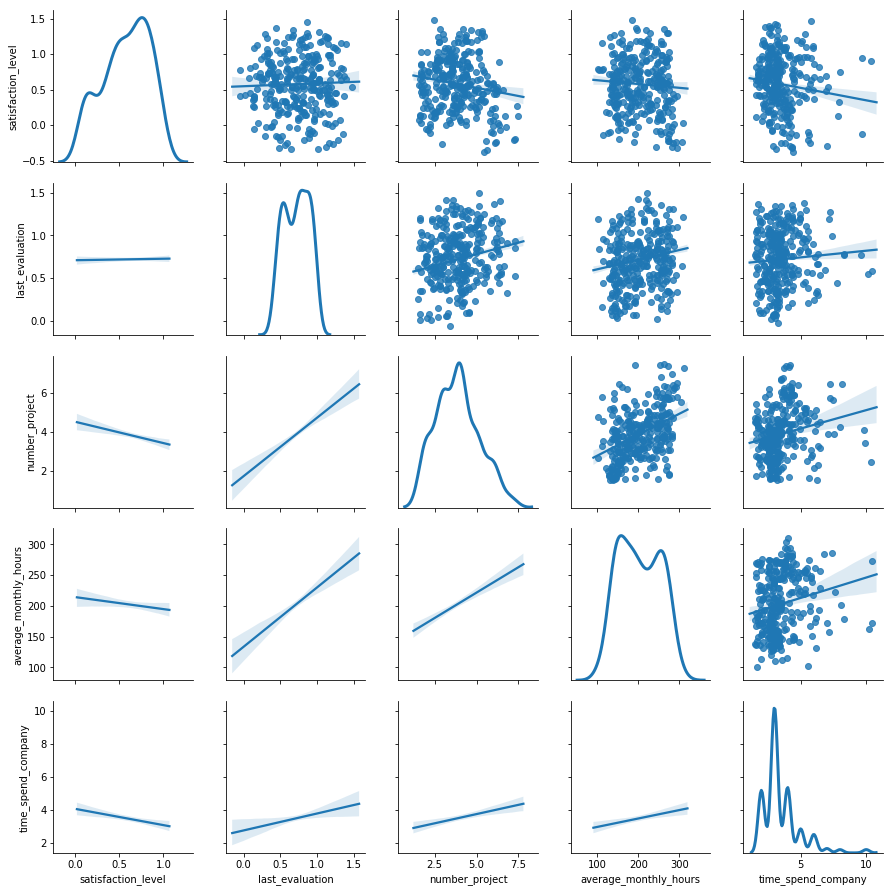

In [8]:
g = sns.PairGrid(df2.dropna(), diag_sharey=False)

g.map_upper(sns.regplot, x_jitter=.5, y_jitter=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.show()

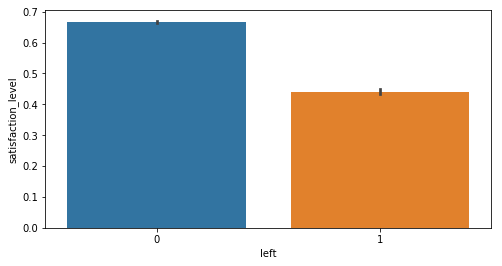

In [9]:
sns.barplot(x="left", y="satisfaction_level", data=df)
plt.show()

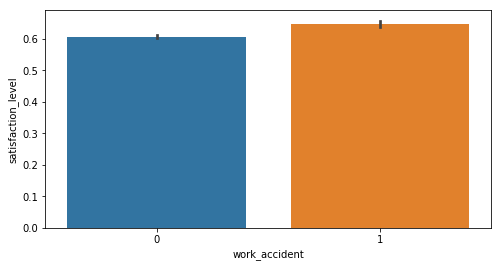

In [10]:
sns.barplot(x="work_accident", y="satisfaction_level", data=df)
plt.show()

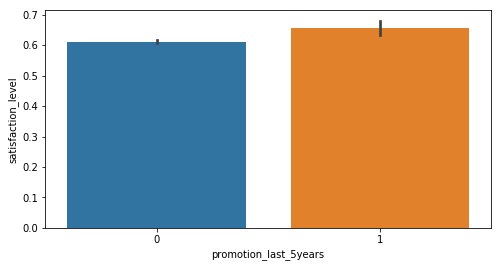

In [11]:
sns.barplot(x="promotion_last_5years", y="satisfaction_level", data=df)
plt.show()

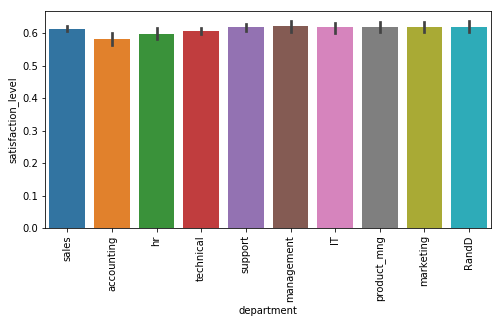

In [12]:
sns.barplot(x="department", y="satisfaction_level", data=df)
plt.xticks(rotation=90)
plt.show()

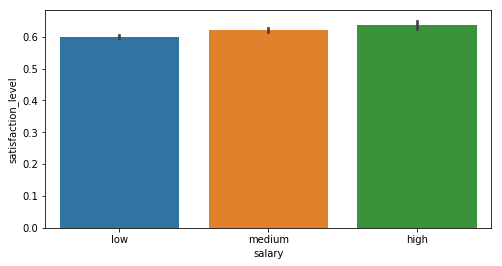

In [13]:
sns.barplot(x="salary", y="satisfaction_level", data=df)
plt.show()

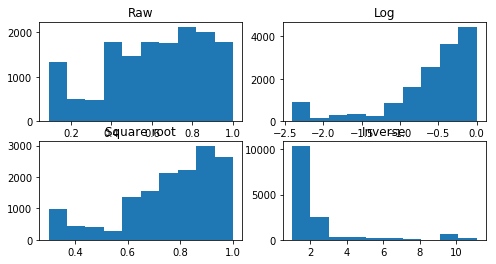

In [14]:
#checking if data can be normalized
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['satisfaction_level'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['satisfaction_level'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['satisfaction_level'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['satisfaction_level'].dropna())
plt.title('Inverse')
plt.show()

In [15]:
#create numeric columns out of categorical data
features = pd.get_dummies(df)

Using pd.get_dummies changes all categorical data into numeric data. Thus spliting the departments into 10 columns and salary into 3 columns, allowing for an easier comparison of each group within its own category.

In [16]:
df['average_monthly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_monthly_hours, dtype: float64

In [17]:
#split average monthly hours into four quadrants
features['hours_first'] = np.where(df['average_monthly_hours']<=156, 1, 0)
features['hours_second'] = np.where((df.average_monthly_hours >= 156) & (df.average_monthly_hours < 200), 1, 0)
features['hours_third'] = np.where((df.average_monthly_hours >= 200) & (df.average_monthly_hours < 245), 1, 0)
features['hours_fourth'] = np.where(df['average_monthly_hours']>=245, 1, 0)

#test to see if it worked
print(df['average_monthly_hours'].groupby(features['hours_first']).describe())
print(df['average_monthly_hours'].groupby(features['hours_second']).describe())
print(df['average_monthly_hours'].groupby(features['hours_third']).describe())
print(df['average_monthly_hours'].groupby(features['hours_fourth']).describe())

               count        mean        std    min    25%    50%    75%    max
hours_first                                                                   
0            11166.0  222.459520  38.638547  157.0  189.0  225.0  255.0  310.0
1             3833.0  138.682755  13.648341   96.0  133.0  141.0  149.0  156.0
                count        mean        std    min    25%    50%    75%  \
hours_second                                                               
0             11213.0  209.548114  54.700023   96.0  149.0  224.0  255.0   
1              3786.0  175.882462  13.150051  156.0  164.0  175.0  187.0   

                max  
hours_second         
0             310.0  
1             199.0  
               count        mean        std    min    25%    50%    75%    max
hours_third                                                                   
0            11281.0  193.745679  55.184562   96.0  149.0  176.0  254.0  310.0
1             3718.0  223.213825  13.019211  200.0  21

Splting the employee's average monthly hours into four seperate quadrants could help us better understand if the amount of hours an individual works has any correlation with employee satisfaction

In [18]:
df3 = df[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company']]

X = StandardScaler().fit_transform(df3)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728 ]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995 ]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668]]


In [19]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.08688429]
 [ 0.50740199]
 [ 0.57907693]
 [ 0.54928085]
 [ 0.31297732]]
Eigenvalue 1: 1.829768571252532
----------------------------------------
Eigenvector 2: 
[[-0.83127011]
 [-0.36996992]
 [ 0.11257602]
 [-0.12457178]
 [ 0.37936893]]
Eigenvalue 2: 1.1092053415825287
----------------------------------------
Eigenvector 3: 
[[ 0.3820556 ]
 [ 0.04741566]
 [-0.20954619]
 [-0.25376183]
 [ 0.86225321]]
Eigenvalue 3: 0.8771803790413093
----------------------------------------
Eigenvector 4: 
[[-0.28524747]
 [ 0.30553046]
 [-0.77977926]
 [ 0.46267183]
 [ 0.05625046]]
Eigenvalue 4: 0.549121355723779
----------------------------------------
Eigenvector 5: 
[[-0.27222882]
 [ 0.71419072]
 [-0.00559089]
 [-0.63585544]
 [-0.10714332]]
Eigenvalue 5: 0.6350577301835564
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [ 0.36592932  0.22182628  0.17542438  0.10981695  0.12700308]


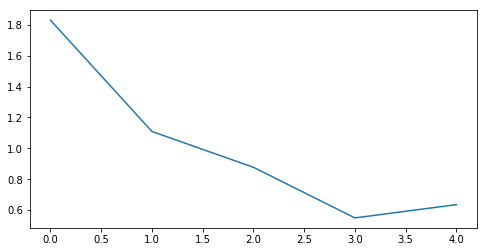

In [20]:
plt.plot(eig_val_cov)
plt.show()

C:\Users\starr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


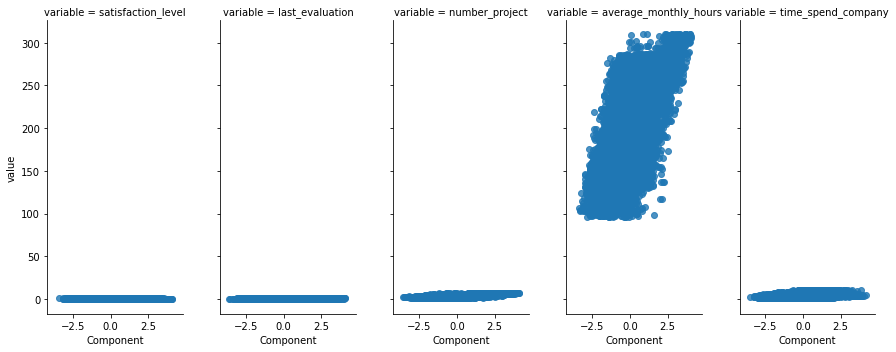

In [21]:
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df3
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=5, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.36592932  0.22182628  0.17542438  0.12700308  0.10981695]


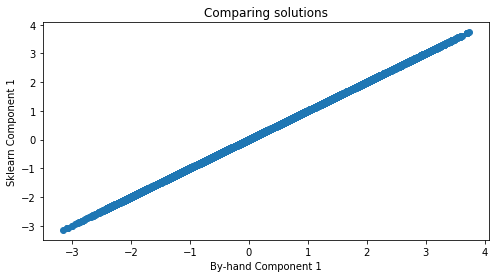

In [22]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

If 75% is enough then I could use just the first 3 components (78%)